In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
datadir = '/home/mei/nas/docker/dataset/EICU/eicu-collaborative-research-database-2.0/'
porcesseddir = '/home/mei/nas/docker/processedData/'

In [4]:
def round_up(x, base=5):
    return base * round(x/base)

In [5]:
df = pd.read_csv(datadir + 'lab.csv.gz', compression='gzip')

In [6]:
df.head()

,labid,patientunitstayid,labresultoffset,labtypeid,labname,labresult,labresulttext,labmeasurenamesystem,labmeasurenameinterface,labresultrevisedoffset
0,52307161,141168,2026,3,fibrinogen,177.0,177,mg/dL,mg/dL,2219
1,50363251,141168,1133,3,PT - INR,2.5,2.5,ratio,NaN,1208
2,49149139,141168,2026,1,magnesium,2.0,2.0,mg/dL,mg/dL,2090
3,50363250,141168,1133,3,PT,26.6,26.6,sec,sec,1208
4,66695374,141168,2141,7,pH,7.2,7.20,NaN,Units,2155


In [7]:
df_patient = pd.read_csv(porcesseddir + 'selected_patients.csv')
df_selected_lab= pd.merge(df_patient, df, on='patientunitstayid')

In [8]:
df_selected_lab.head()

,patientunitstayid,hospitaladmitoffset,gender,age,apacheadmissiondx,unitadmitsource,admissionweight,dischargeweight,unitdischargelocation,unitdischargestatus,labid,labresultoffset,labtypeid,labname,labresult,labresulttext,labmeasurenamesystem,labmeasurenameinterface,labresultrevisedoffset
0,141168,0,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired,52307161,2026,3,fibrinogen,177.0,177,mg/dL,mg/dL,2219
1,141168,0,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired,50363251,1133,3,PT - INR,2.5,2.5,ratio,NaN,1208
2,141168,0,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired,49149139,2026,1,magnesium,2.0,2.0,mg/dL,mg/dL,2090
3,141168,0,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired,50363250,1133,3,PT,26.6,26.6,sec,sec,1208
4,141168,0,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired,66695374,2141,7,pH,7.2,7.20,NaN,Units,2155


In [9]:
# Set indices
lab=df_selected_lab.copy()
lab.set_index(['patientunitstayid', 'labresultoffset'], inplace = True)
lab.drop(lab.index[np.where(lab.index.get_level_values('labresultoffset') < 0)], inplace= True)
# Pivot table
lab = pd.pivot_table(lab ,values = 'labresult', index=['patientunitstayid', 'labresultoffset'], columns='labname')
lab.columns.name = None
# Resample every 5 mins
lab.rename(round_up, level = 'labresultoffset', inplace = True)
lab = lab.groupby(['patientunitstayid', 'labresultoffset']).mean()

In [10]:
lab.head(n=10)

-bands  -basos  -eos  -lymphs  -monos  \
patientunitstayid labresultoffset                                          
141168            230                 NaN     NaN   NaN      NaN     NaN   
                  515                 NaN     0.0   1.0     19.0    19.0   
                  1135                NaN     0.0   0.0      6.0    14.0   
                  1700                NaN     NaN   NaN      NaN     NaN   
                  1805                NaN     NaN   NaN      NaN     NaN   
                  2010                NaN     NaN   NaN      NaN     NaN   
                  2025                NaN     0.0   0.0     10.0    12.0   
                  2140                NaN     NaN   NaN      NaN     NaN   
141229            75                  NaN     NaN   NaN      NaN     NaN   
                  565                 NaN     NaN   NaN      NaN     NaN   

                                   -polys  24 h urine protein  \
patientunitstayid labresultoffset                               
141168            230                 NaN                 NaN   
                  515                61.0                 NaN   
                  1135               80.0                 NaN   
                  1700                NaN                 NaN   
                  1805                NaN                 NaN   
                  2010                NaN                 NaN   
                  2025               78.0                 NaN   
                  2140                NaN                 NaN   
141229            75                  NaN                 NaN   
                  565                 NaN                 NaN   

                                   24 h urine urea nitrogen  ALT (SGPT)  \
patientunitstayid labresultoffset                                         
141168            230                                   NaN         NaN   
                  515                                   NaN        40.0   
                  1135                                  NaN       358.0   
                  1700                                  NaN         NaN   
                  1805                                  NaN         NaN   
                  2010                                  NaN         NaN   
                  2025                                  NaN      1189.0   
                  2140                                  NaN         NaN   
141229            75                                    NaN         NaN   
                  565                                   NaN         NaN   

                                   ANF/ANA  ...  total protein  transferrin  \
patientunitstayid labresultoffset           ...                               
141168            230                  NaN  ...            NaN          NaN   
                  515                  NaN  ...            7.1          NaN   
                  1135                 NaN  ...            7.1          NaN   
                  1700                 NaN  ...            NaN          NaN   
                  1805                 NaN  ...            NaN          NaN   
                  2010                 NaN  ...            NaN          NaN   
                  2025                 NaN  ...            6.3          NaN   
                  2140                 NaN  ...            NaN          NaN   
141229            75                   NaN  ...            NaN          NaN   
                  565                  NaN  ...            NaN          NaN   

                                   triglycerides  troponin - I  troponin - T  \
patientunitstayid labresultoffset                                              
141168            230                        NaN           NaN           NaN   
                  515                        NaN           NaN           NaN   
                  1135                       NaN           NaN           NaN   
                  1700                       NaN           NaN           NaN   
           

In [11]:
frequency = pd.DataFrame()
frequency['noAnnotations'] = lab.notna().sum()
frequency['%'] = lab.notna().sum() / len(lab.index) * 100
frequency.sort_values('noAnnotations', inplace = True, ascending = False)
frequency.head(n=10)

,noAnnotations,%
bedside glucose,1298151,55.295081
potassium,584941,24.915715
sodium,557049,23.727648
glucose,529558,22.556661
chloride,521057,22.194559
creatinine,519735,22.138248
BUN,517557,22.045476
calcium,501472,21.360331
Hgb,493328,21.013435
bicarbonate,489888,20.866907


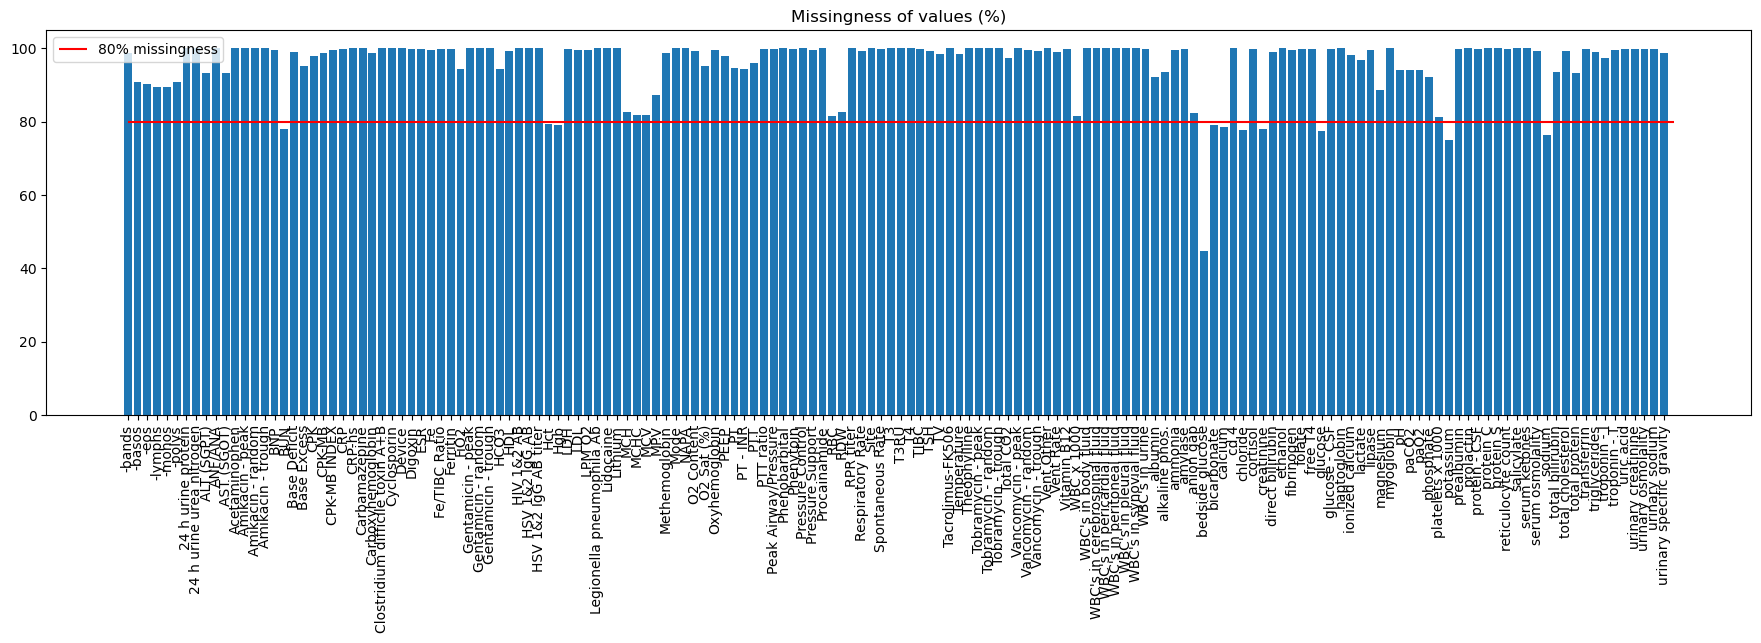

In [12]:
plt.rcParams["figure.figsize"] = (22,5)
missing_ratio = pd.DataFrame(lab.isna().sum() / len(lab.index), columns = ['missing ratio']) * 100
plt.title('Missingness of values (%)')
plt.bar(missing_ratio.index, missing_ratio['missing ratio'])
plt.xticks(np.arange(0, len(missing_ratio.index)), labels=missing_ratio.index, rotation=90)
plt.hlines(80, 0, len(missing_ratio.index), colors = 'red', label = '80% missingness')
plt.legend()
plt.show()

In [15]:
min_missingness = 80
vitals_to_include = missing_ratio[missing_ratio['missing ratio'] < min_missingness].index.values.tolist()
vitals_to_include

['BUN',
 'Hct',
 'Hgb',
 'bedside glucose',
 'bicarbonate',
 'calcium',
 'chloride',
 'creatinine',
 'glucose',
 'potassium',
 'sodium']

In [16]:
lab_ = lab[vitals_to_include]
lab_.describe()

,BUN,Hct,Hgb,bedside glucose,bicarbonate,calcium,chloride,creatinine,glucose,potassium,sodium
count,517557.000000,486043.000000,493328.000000,1.298151e+06,489888.000000,501472.000000,521057.000000,519735.000000,529558.000000,584941.000000,557049.000000
mean,28.160304,31.558144,10.369002,1.571272e+02,25.082776,8.358904,104.336484,1.563788,142.253485,3.986192,138.938907
std,45.360945,6.435617,2.194535,6.644299e+01,5.463586,0.788926,7.252025,1.695888,72.476144,0.626057,6.213623
min,0.000000,1.000000,0.000000,1.000000e+01,2.000000,0.910000,50.000000,0.060000,0.000000,0.000000,0.000000
25%,13.000000,26.700000,8.700000,1.120000e+02,22.000000,7.900000,100.000000,0.700000,101.000000,3.600000,136.000000
50%,21.000000,31.000000,10.100000,1.410000e+02,25.000000,8.400000,104.000000,0.990000,123.000000,3.900000,139.000000
75%,36.000000,36.000000,11.800000,1.860000e+02,28.000000,8.800000,109.000000,1.650000,160.000000,4.300000,142.000000
max,28131.000000,72.700000,45.000000,6.850000e+02,77.000000,40.500000,162.000000,38.990000,2827.000000,13.000000,224.000000


In [17]:
lab_.head(n=10)

BUN   Hct   Hgb  bedside glucose  \
patientunitstayid labresultoffset                                      
141168            230               NaN   NaN   NaN              NaN   
                  515              26.0  40.1  13.0              NaN   
                  1135             27.0  40.4  13.3              NaN   
                  1700              NaN   NaN   NaN              NaN   
                  1805              NaN   NaN   NaN              NaN   
                  2010              NaN   NaN   NaN              NaN   
                  2025             29.0  36.5  11.4              NaN   
                  2140              NaN   NaN   NaN              NaN   
141229            75                NaN   NaN   NaN              NaN   
                  565               NaN   NaN   NaN            112.0   

                                   bicarbonate  calcium  chloride  creatinine  \
patientunitstayid labresultoffset                                               
141168            230                      NaN      NaN       NaN         NaN   
                  515                     26.0      8.8     102.0        1.95   
                  1135                    22.0      9.2     101.0        2.30   
                  1700                     NaN      NaN       NaN         NaN   
                  1805                     NaN      NaN       NaN         NaN   
                  2010                     NaN      NaN       NaN         NaN   
                  2025                    18.0      8.5     101.0        2.95   
                  2140                     NaN      NaN       NaN         NaN   
141229            75                       NaN      NaN       NaN         NaN   
                  565                      NaN      NaN       NaN         NaN   

                                   glucose  potassium  sodium  
patientunitstayid labresultoffset                              
141168            230                  NaN        NaN     NaN  
                  515                131.0        4.0   139.0  
                  1135                95.0        4.2   139.0  
                  1700                 NaN        NaN     NaN  
                  1805                 NaN        NaN     NaN  
                  2010                 NaN        NaN     NaN  
                  2025                54.0        4.3   140.0  
                  2140                 NaN        NaN     NaN  
141229            75                   NaN        NaN     NaN  
                  565                  NaN        NaN     NaN

In [24]:
# lab_.to_csv(porcesseddir + 'selected_lab.csv',  index=True)
# print("Data exported successfully to 'selected_lab.csv'.")

Data exported successfully to 'selected_lab.csv'.


In [18]:
selected_lab_p=len(list(lab_.index.get_level_values('patientunitstayid').unique()))
selected_lab_x=len(lab_)
print("There are {} unique patientunitstayid in the selected patients with the total {} records.".format(selected_lab_p,selected_lab_x))

There are 98585 unique patientunitstayid in the selected patients with the total 2347679 records.


Correlation of lab measurements throughout the stays


<Axes: >

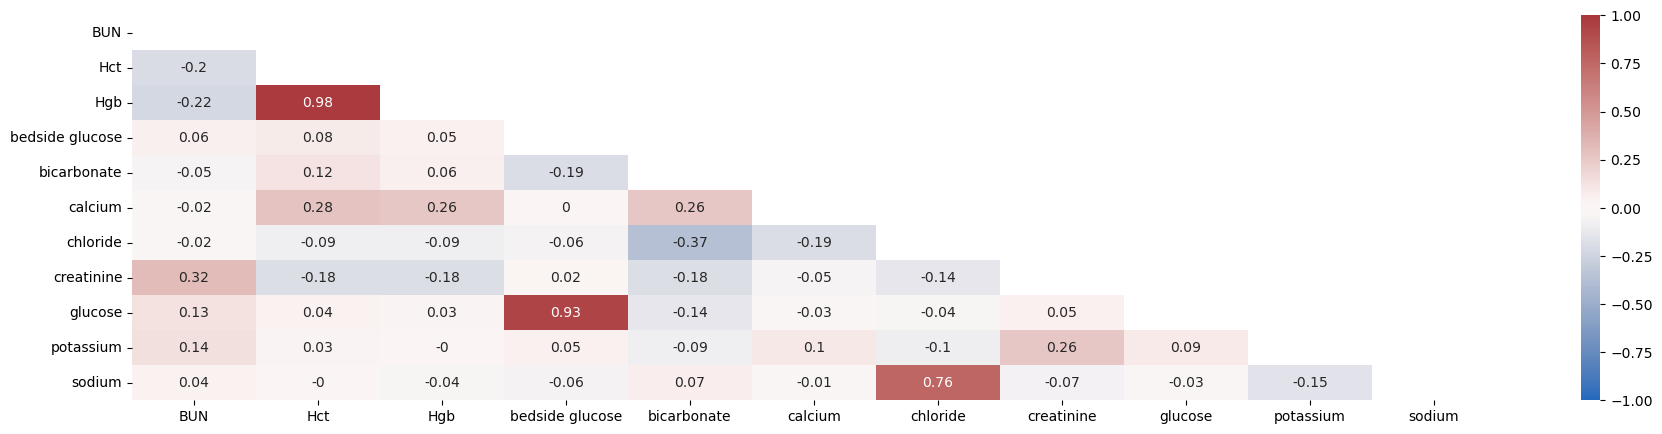

In [19]:
matrix = lab_.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
print('Correlation of lab measurements throughout the stays')
sns.heatmap(matrix, annot=True, vmin = -1, vmax = 1, cmap='vlag', mask=mask)

In [20]:
std = lab_.groupby(['patientunitstayid']).std()
print('Standard deviation of lab measurements over ICU stay for each patient')
std.head()

Standard deviation of lab measurements over ICU stay for each patient


,BUN,Hct,Hgb,bedside glucose,bicarbonate,calcium,chloride,creatinine,glucose,potassium,sodium
patientunitstayid,,,,,,,,,,,
141168,1.527525,2.170253,1.021437,NaN,4.00000,0.351188,0.577350,0.507445,38.527047,0.152753,0.577350
141229,1.000000,NaN,NaN,42.397261,1.00000,0.070711,3.055050,0.047258,5.656854,0.665833,3.000000
141260,NaN,NaN,NaN,43.851074,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141265,5.244044,0.983362,0.563028,22.098186,0.83666,0.367423,1.414214,0.132174,23.989581,0.291139,0.547723


In [21]:
mean = lab_.groupby(['patientunitstayid']).mean()
print('Mean value of vital signs over ICU stay for each patient')
mean.head()

Mean value of vital signs over ICU stay for each patient


,BUN,Hct,Hgb,bedside glucose,bicarbonate,calcium,chloride,creatinine,glucose,potassium,sodium
patientunitstayid,,,,,,,,,,,
141168,27.333333,39.00,12.566667,NaN,22.0,8.833333,101.333333,2.400000,93.333333,4.166667,139.333333
141229,21.000000,34.00,11.300000,132.444444,31.0,8.250000,104.666667,1.183333,112.000000,3.666667,143.000000
141260,8.000000,40.80,13.000000,169.250000,24.0,8.000000,101.000000,1.040000,289.000000,4.600000,136.000000
141264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141265,17.000000,43.58,15.380000,113.636364,26.2,8.900000,101.000000,0.842000,119.000000,3.585714,137.600000


In [23]:
lab_.head()

BUN   Hct   Hgb  bedside glucose  \
patientunitstayid labresultoffset                                      
141168            230               NaN   NaN   NaN              NaN   
                  515              26.0  40.1  13.0              NaN   
                  1135             27.0  40.4  13.3              NaN   
                  1700              NaN   NaN   NaN              NaN   
                  1805              NaN   NaN   NaN              NaN   

                                   bicarbonate  calcium  chloride  creatinine  \
patientunitstayid labresultoffset                                               
141168            230                      NaN      NaN       NaN         NaN   
                  515                     26.0      8.8     102.0        1.95   
                  1135                    22.0      9.2     101.0        2.30   
                  1700                     NaN      NaN       NaN         NaN   
                  1805                     NaN      NaN       NaN         NaN   

                                   glucose  potassium  sodium  
patientunitstayid labresultoffset                              
141168            230                  NaN        NaN     NaN  
                  515                131.0        4.0   139.0  
                  1135                95.0        4.2   139.0  
                  1700                 NaN        NaN     NaN  
                  1805                 NaN        NaN     NaN

In [20]:
lab= pd.read_csv(porcesseddir + 'selected_lab.csv')
# patient=pd.read_csv(porcesseddir + 'selected_patients.csv')
diagnosis=pd.read_csv(porcesseddir + 'selected_diagnosis.csv')
diagnosis_lab = pd.merge(lab,diagnosis, on='patientunitstayid')

In [28]:
lab.head()

,patientunitstayid,labresultoffset,BUN,Hct,Hgb,bedside glucose,bicarbonate,calcium,chloride,creatinine,glucose,potassium,sodium
0,141168,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,141168,515,26.0,40.1,13.0,NaN,26.0,8.8,102.0,1.95,131.0,4.0,139.0
2,141168,1135,27.0,40.4,13.3,NaN,22.0,9.2,101.0,2.30,95.0,4.2,139.0
3,141168,1700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,141168,1805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
diagnosis.head()

,patientunitstayid,diagnosisoffset,hospitaladmitoffset,gender,age,apacheadmissiondx,unitadmitsource,admissionweight,dischargeweight,unitdischargelocation,unitdischargestatus,activeupondischarge,diagnosisstring,icd9code,diagnosispriority
0,141168,70,0,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired,False,cardiovascular|chest pain / ASHD|coronary arte...,"414.00, I25.10",Other
1,141168,70,0,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired,False,pulmonary|disorders of the airways|COPD,"491.20, J44.9",Other
2,141168,70,0,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired,False,cardiovascular|ventricular disorders|congestiv...,"428.0, I50.9",Other
3,141168,70,0,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired,False,cardiovascular|ventricular disorders|cardiomyo...,NaN,Other
4,141168,70,0,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired,False,renal|disorder of kidney|chronic kidney disease,"585.9, N18.9",Other


In [27]:
diagnosis_lab.head()

,patientunitstayid,labresultoffset,BUN,Hct,Hgb,bedside glucose,bicarbonate,calcium,chloride,creatinine,...,apacheadmissiondx,unitadmitsource,admissionweight,dischargeweight,unitdischargelocation,unitdischargestatus,activeupondischarge,diagnosisstring,icd9code,diagnosispriority
0,141168,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired,False,cardiovascular|chest pain / ASHD|coronary arte...,"414.00, I25.10",Other
1,141168,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired,False,pulmonary|disorders of the airways|COPD,"491.20, J44.9",Other
2,141168,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired,False,cardiovascular|ventricular disorders|congestiv...,"428.0, I50.9",Other
3,141168,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired,False,cardiovascular|ventricular disorders|cardiomyo...,NaN,Other
4,141168,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired,False,renal|disorder of kidney|chronic kidney disease,"585.9, N18.9",Other


In [30]:
diagnosis_lab_bun=diagnosis_lab[['patientunitstayid','labresultoffset','diagnosisstring','BUN']]
diagnosis_lab_bun.set_index(['patientunitstayid','labresultoffset'],inplace = True)
diagnosis_lab_bun.head(n=20)

diagnosisstring  \
patientunitstayid labresultoffset                                                      
141168            230              cardiovascular|chest pain / ASHD|coronary arte...   
                  230                        pulmonary|disorders of the airways|COPD   
                  230              cardiovascular|ventricular disorders|congestiv...   
                  230              cardiovascular|ventricular disorders|cardiomyo...   
                  230                renal|disorder of kidney|chronic kidney disease   
                  230              cardiovascular|arrhythmias|atrial fibrillation...   
                  230              cardiovascular|ventricular disorders|cardiomyo...   
                  230                        pulmonary|disorders of the airways|COPD   
                  230              cardiovascular|ventricular disorders|congestiv...   
                  230              cardiovascular|arrhythmias|atrial fibrillation...   
                  230                renal|disorder of kidney|chronic kidney disease   
                  230              cardiovascular|chest pain / ASHD|coronary arte...   
                  515              cardiovascular|chest pain / ASHD|coronary arte...   
                  515                        pulmonary|disorders of the airways|COPD   
                  515              cardiovascular|ventricular disorders|congestiv...   
                  515              cardiovascular|ventricular disorders|cardiomyo...   
                  515                renal|disorder of kidney|chronic kidney disease   
                  515              cardiovascular|arrhythmias|atrial fibrillation...   
                  515              cardiovascular|ventricular disorders|cardiomyo...   
                  515                        pulmonary|disorders of the airways|COPD   

                                    BUN  
patientunitstayid labresultoffset        
141168            230               NaN  
                  230               NaN  
                  230               NaN  
                  230               NaN  
                  230               NaN  
                  230               NaN  
                  230               NaN  
                  230               NaN  
                  230               NaN  
                  230               NaN  
                  230               NaN  
                  230               NaN  
                  515              26.0  
                  515              26.0  
                  515              26.0  
                  515              26.0  
                  515              26.0  
                  515              26.0  
                  515              26.0  
                  515              26.0

In [31]:
average_bun = diagnosis_lab_bun.groupby('diagnosisstring')['BUN'].mean()


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import getpass
import pdvega
import seaborn as sns
# for configuring connection 
from configobj import ConfigObj
import os

%matplotlib inline

In [ ]:
# Create a database connection using settings from config file
config='../db/config.ini'

# connection info
conn_info = dict()
if os.path.isfile(config):
    config = ConfigObj(config)
    conn_info["sqluser"] = config['username']
    conn_info["sqlpass"] = config['password']
    conn_info["sqlhost"] = config['host']
    conn_info["sqlport"] = config['port']
    conn_info["dbname"] = config['dbname']
    conn_info["schema_name"] = config['schema_name']
else:
    conn_info["sqluser"] = 'postgres'
    conn_info["sqlpass"] = ''
    conn_info["sqlhost"] = '192.168.60.144'
    conn_info["sqlport"] = 5433
    conn_info["dbname"] = 'eicu'
    conn_info["schema_name"] = 'public,eicu_crd'
    
# Connect to the eICU database
print('Database: {}'.format(conn_info['dbname']))
print('Username: {}'.format(conn_info["sqluser"]))
if conn_info["sqlpass"] == '':
    # try connecting without password, i.e. peer or OS authentication
    try:
        if (conn_info["sqlhost"] == '192.168.60.144') & (conn_info["sqlport"]=='5433'):
            con = psycopg2.connect(dbname=conn_info["dbname"],
                                   user=conn_info["sqluser"])            
        else:
            con = psycopg2.connect(dbname=conn_info["dbname"],
                                   host=conn_info["sqlhost"],
                                   port=conn_info["sqlport"],
                                   user=conn_info["sqluser"])
    except:
        conn_info["sqlpass"] = getpass.getpass('Password: ')

        con = psycopg2.connect(dbname=conn_info["dbname"],
                               host=conn_info["sqlhost"],
                               port=conn_info["sqlport"],
                               user=conn_info["sqluser"],
                               password=conn_info["sqlpass"])
query_schema = 'set search_path to ' + conn_info['schema_name'] + ';'

In [1]:
from sqlalchemy import create_engine
con= create_engine('postgresql://eicu@192.168.60.144:5432/eicu')

In [3]:
def round_up(x, base=5):
    return base * round(x/base)

In [5]:
# query = query_schema + """
query = """
select *
from lab
"""

df_lab = pd.read_sql_query(query, con)
n_lab = df_lab['patientunitstayid'].nunique()
print("There are {} icu patients in the lab  record.".format(n_lab))

: 

In [6]:
query = query_schema + """

with selected_patients as (
SELECT DISTINCT patientunitstayid,gender,age,apacheadmissiondx,unitadmitsource,admissionweight,	dischargeweight,unitdischargelocation,	unitdischargestatus
FROM patient
WHERE unitadmitsource IN ('Emergency Department', 'Direct Admit') 
)
select l.labid, l.labtypeid	,l.labname, l.labresult,l.labmeasurenamesystem, sp.*
from lab l
join selected_patients sp
  on l.patientunitstayid = sp.patientunitstayid
 """

df_lab_selected = pd.read_sql_query(query, con)
df_lab_selected.head()

,labid,labtypeid,labname,labresult,labmeasurenamesystem,patientunitstayid,gender,age,apacheadmissiondx,unitadmitsource,admissionweight,dischargeweight,unitdischargelocation,unitdischargestatus
0,52307161,3.0,fibrinogen,177.0,mg/dL,141168,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired
1,50363251,3.0,PT - INR,2.5,ratio,141168,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired
2,49149139,1.0,magnesium,2.0,mg/dL,141168,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired
3,50363250,3.0,PT,26.6,sec,141168,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired
4,66695374,7.0,pH,7.2,,141168,Female,70,"Rhythm disturbance (atrial, supraventricular)",Direct Admit,84.3,85.8,Death,Expired


In [7]:
# df_lab_selected.to_csv('/Users/meisun/Documents/study/thesis/master project/data-preprocessing/selected_patients_lab.csv')

In [ ]:
df_lab_selected = pd.read_csv('/Users/meisun/Documents/study/thesis/master project/data-preprocessing/selected_patients_lab.csv')

In [ ]:
# Set indices
lab=df_lab_selected.set_index(['patientunitstayid', 'labid'], inplace = True)
# Pivot table
lab= pd.pivot_table(df_lab_selected ,values = 'labresult', index=['patientunitstayid', 'labid'], columns='labname')
lab.columns.name = None
lab = lab.groupby(['patientunitstayid', 'labid']).mean()